# The Explorers - Sprint 4 - Project Notebook

# Libraries

In [37]:
# General
import pandas as pd

# Text Pre-processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import spacy
nlp = spacy.load('en_core_web_sm')

# Visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import Dataset

In [4]:
jobs_df = pd.read_csv('https://media.githubusercontent.com/media/jmgang/the-explorers-project-notebooks/main/data/job_postings.csv')
jobs_df.head(3)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.0,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644


In [ ]:
jobs_df = jobs_df.drop(['job_id', 'skills_desc', 'applies', 'original_listed_time', 'views', 'job_posting_url', 
                                 'application_url', 'application_type', 'expiry', 'closed_time',
                                 'listed_time', 'posting_domain', 'sponsored', 'scraped', 'med_salary'], axis=1)

In [8]:
engg_jobs_df = jobs_df[jobs_df.title.str.lower().str.contains('engineer')].reset_index(drop=True)
engg_jobs_df.head(3)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",...,NaN,Mid-Senior level,NaN,1.699080e+12,recruit.zoho.com,0,FULL_TIME,USD,BASE_SALARY,1699132529
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,Mid-Senior level,NaN,1.699080e+12,NaN,0,FULL_TIME,NaN,NaN,1699089920


In [10]:
engg_jobs_df['description'] = engg_jobs_df['description'].astype(str)

# Extract Description & Tokenize Text

In [14]:
# Extracting the job description from the dataset
job_description = engg_jobs_df['description'].str.cat(sep=' ')

In [17]:
# Tokenize the reviews
tokens = word_tokenize(job_description)

## Text preprocessing & basic text statistics

In [18]:
tokens = [word.lower() for word in tokens
          if word not in stopwords.words('english')
          and word.isalpha()] # word not in string.punctuation

In [19]:
len(tokens)

1104931

In [20]:
word_counts = nltk.FreqDist(tokens)

print("Top 10 words by frequency:")
for word, freq in word_counts.most_common(10):
    print(f"{word}: {freq}")

Top 10 words by frequency:
experience: 12398
work: 9168
engineering: 9131
team: 6937
design: 6874
we: 6262
technical: 5619
development: 5385
data: 5341
systems: 4898


## Barchart of top 10 frequent words

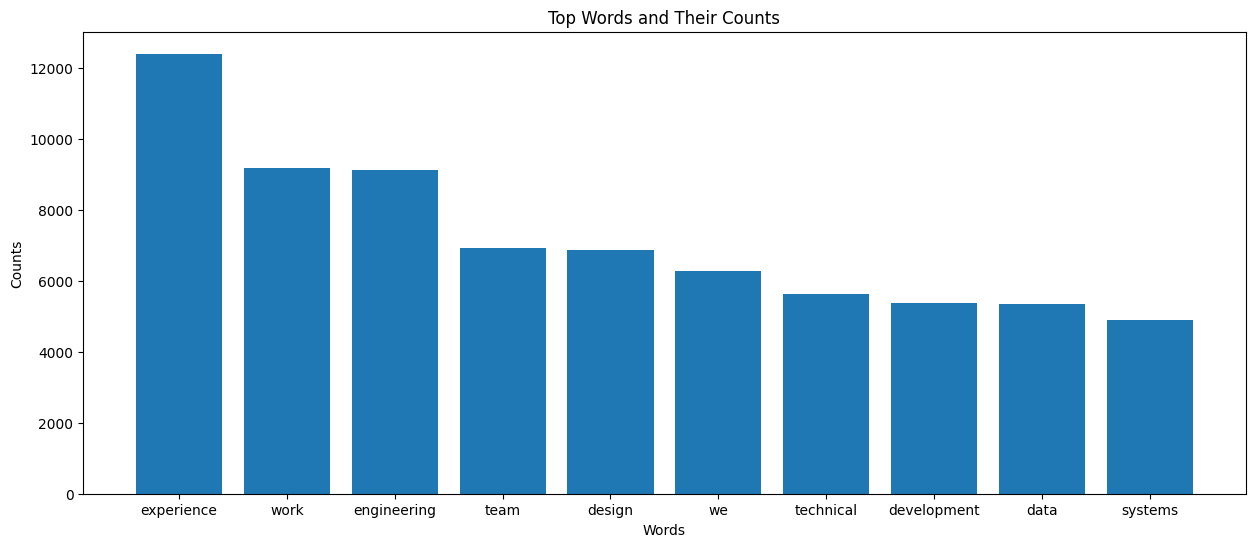

In [24]:
top_words = word_counts.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(15, 6))
plt.bar(words, counts)
plt.title('Top Words and Their Counts')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()

## Wordcloud of Job Description

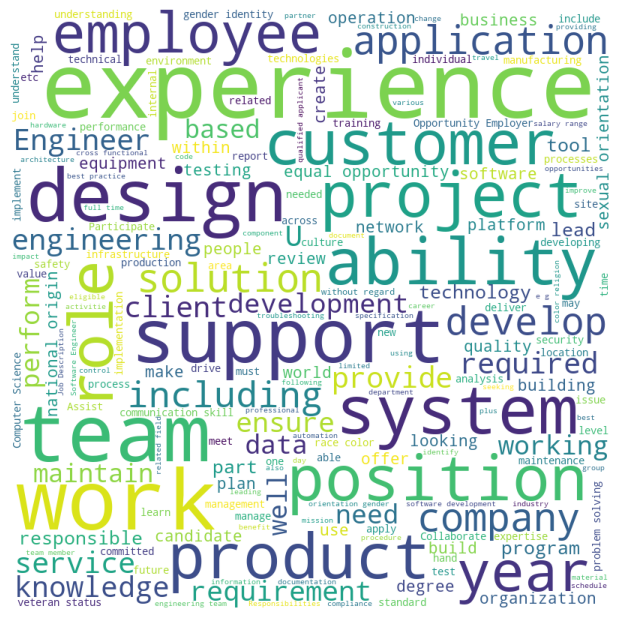

In [22]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = set(stopwords.words('english')),
                          min_font_size = 10).generate(text)

    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

generate_wordcloud(job_description)

# Text Pre-Processing (NLTK)

## Tokenization

In [30]:
# Define function for tokenizing text
def tokenize_text(text):
    return word_tokenize(text)

In [31]:
engg_jobs_df['tokens'] = engg_jobs_df['description'].apply(tokenize_text)
engg_jobs_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,tokens
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,"[The, TSUBAKI, name, is, synonymous, with, exc..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",...,Mid-Senior level,NaN,1.699080e+12,recruit.zoho.com,0,FULL_TIME,USD,BASE_SALARY,1699132529,"[Head-huntress.com, has, a, Direct, Hire, oppo..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,Mid-Senior level,NaN,1.699080e+12,NaN,0,FULL_TIME,NaN,NaN,1699089920,"[We, 're, seeking, a, Lead, Electrical, Engine..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,Mid-Senior level,NaN,1.699080e+12,NaN,0,FULL_TIME,NaN,NaN,1699090595,"[About, Us, :, We, are, a, premier, organizati..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,Mid-Senior level,NaN,1.699080e+12,NaN,1,FULL_TIME,NaN,NaN,1699088802,"[Join, a, premier, organization, at, the, fore..."


## Removing stop words, punctuation marks, and noise

In [33]:
# Set up stopwords
stop_words = set(stopwords.words('english'))

# Define function for noise removal
def remove_stopwords_punctuation_noise(tokens):
    return [word for word in tokens if word.lower() not in stop_words 
            and word.lower() not in string.punctuation]

# Apply noise removal
engg_jobs_df['tokens_no_stopwords'] = engg_jobs_df['tokens'].apply(remove_stopwords_punctuation_noise)
engg_jobs_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped,tokens,tokens_no_stopwords
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",...,NaN,1.699080e+12,recruit.zoho.com,0,FULL_TIME,USD,BASE_SALARY,1699132529,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Head-huntress.com, Direct, Hire, opportunity,..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,1.699080e+12,NaN,0,FULL_TIME,NaN,NaN,1699089920,"[We, 're, seeking, a, Lead, Electrical, Engine...","['re, seeking, Lead, Electrical, Engineer, joi..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,1.699080e+12,NaN,0,FULL_TIME,NaN,NaN,1699090595,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, cutting..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,1.699080e+12,NaN,1,FULL_TIME,NaN,NaN,1699088802,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti..."


## Stemming

In [34]:
# Set up PorterStemmer
ps = PorterStemmer()

# Define a function for stemming
def stem_tokens(tokens):
    return [ps.stem(word) for word in tokens]

# Apply stemming
engg_jobs_df['stemmed_tokens'] = engg_jobs_df['tokens_no_stopwords'].apply(stem_tokens)

## Lemmatization

In [35]:
# Set up WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization
engg_jobs_df['lemmatized_tokens'] = engg_jobs_df['tokens_no_stopwords'].apply(lemmatize_tokens)

In [36]:
# Define a function to get the POS tag for a word
def get_wordnet_pos(word):
    # Map POS tag to the first character used by the WordNetLemmatizer
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag = {'N': 'n', 'V': 'v', 'R': 'r', 'J': 'a'}.get(tag, 'n')
    return tag

# Adjust lemmatization function
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word))
            for word in tokens]

# Text Pre-Processing (SpaCy)

## Tokenization

In [39]:
# Define a function for tokenization
def spacy_tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply tokenization
engg_jobs_df['spacy_tokens'] = engg_jobs_df['description'].apply(spacy_tokenize_text)
engg_jobs_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,sponsored,work_type,currency,compensation_type,scraped,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,0,FULL_TIME,NaN,NaN,1699085644,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","[TSUBAKI, name, synonymous, excellence, qualit...","[\n, The, TSUBAKI, name, is, synonymous, with,..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",...,0,FULL_TIME,USD,BASE_SALARY,1699132529,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Head-huntress.com, Direct, Hire, opportunity,...","[head-huntress.com, direct, hire, opportun, co...","[Head-huntress.com, Direct, Hire, opportunity,...","[Head-huntress.com, has, a, Direct, Hire, oppo..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,0,FULL_TIME,NaN,NaN,1699089920,"[We, 're, seeking, a, Lead, Electrical, Engine...","['re, seeking, Lead, Electrical, Engineer, joi...","['re, seek, lead, electr, engin, join, dynam, ...","['re, seeking, Lead, Electrical, Engineer, joi...","[We, 're, seeking, a, Lead, Electrical, Engine..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,0,FULL_TIME,NaN,NaN,1699090595,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, cutting...","[us, premier, organ, forefront, cutting-edg, m...","[Us, premier, organization, forefront, cutting...","[About, Us, :, We, are, a, premier, organizati..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,1,FULL_TIME,NaN,NaN,1699088802,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","[join, premier, organ, forefront, cutting-edg,...","[Join, premier, organization, forefront, cutti...","[Join, a, premier, organization, at, the, fore..."


## Removing stop words and punctuation marks

In [87]:
# Define a function for noise removal
def spacy_remove_stopwords_punctuation(tokens):
    doc = nlp(' '.join(tokens))
    return [token.text for token in doc if not token.is_stop and not token.is_punct() and token.text.lower() not in stop_words and token.is_alpha]

# Apply removal of stop words and punctuation
engg_jobs_df['spacy_tokens_no_stopwords'] = engg_jobs_df['spacy_tokens'].apply(spacy_remove_stopwords_punctuation)
engg_jobs_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,currency,compensation_type,scraped,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,1699085644,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","['TSUBAKI', 'name', 'synonymous', 'excellence'...","[\n, The, TSUBAKI, name, is, synonymous, with,...","[TSUBAKI, synonymous, excellence, quality, dep...","['\n ', 'TSUBAKI', 'synonymous', 'excellence'..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",...,USD,BASE_SALARY,1699132529,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Head-huntress.com, Direct, Hire, opportunity,...","[head-huntress.com, direct, hire, opportun, co...","['Head-huntress.com', 'Direct', 'Hire', 'oppor...","[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","['head-huntress.com', 'Direct', 'Hire', 'oppor..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,NaN,1699089920,"[We, 're, seeking, a, Lead, Electrical, Engine...","['re, seeking, Lead, Electrical, Engineer, joi...","['re, seek, lead, electr, engin, join, dynam, ...","[""'re"", 'seeking', 'Lead', 'Electrical', 'Engi...","[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","['seek', 'Lead', 'Electrical', 'Engineer', 'jo..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,NaN,1699090595,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, cutting...","[us, premier, organ, forefront, cutting-edg, m...","['Us', 'premier', 'organization', 'forefront',...","[About, Us, :, We, are, a, premier, organizati...","[premier, organization, forefront, cutting, ed...","['premier', 'organization', 'forefront', 'cut'..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,NaN,1699088802,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","[join, premier, organ, forefront, cutting-edg,...","['Join', 'premier', 'organization', 'forefront...","[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","['join', 'premier', 'organization', 'forefront..."


## Lemmatization

In [88]:
# Define a function for lemmatization
def spacy_lemmatize_tokens(tokens):
    doc = nlp(' '.join(tokens))
    return [token.lemma_ for token in doc]

# Apply lemmatization
engg_jobs_df['spacy_lemmatized_tokens'] = engg_jobs_df['spacy_tokens_no_stopwords'].apply(spacy_lemmatize_tokens)
engg_jobs_df.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,currency,compensation_type,scraped,tokens,tokens_no_stopwords,stemmed_tokens,lemmatized_tokens,spacy_tokens,spacy_tokens_no_stopwords,spacy_lemmatized_tokens
0,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,1699085644,"[The, TSUBAKI, name, is, synonymous, with, exc...","[TSUBAKI, name, synonymous, excellence, qualit...","[tsubaki, name, synonym, excel, qualiti, depen...","['TSUBAKI', 'name', 'synonymous', 'excellence'...","[\n, The, TSUBAKI, name, is, synonymous, with,...","[TSUBAKI, synonymous, excellence, quality, dep...","[tsubaki, synonymous, excellence, quality, dep..."
1,3757934319,18391435.0,Controls Engineer,Head-huntress.com has a Direct Hire opportunit...,150000.0,NaN,121000.0,YEARLY,Full-time,"Orlando, FL",...,USD,BASE_SALARY,1699132529,"[Head-huntress.com, has, a, Direct, Hire, oppo...","[Head-huntress.com, Direct, Hire, opportunity,...","[head-huntress.com, direct, hire, opportun, co...","['Head-huntress.com', 'Direct', 'Hire', 'oppor...","[Head-huntress.com, has, a, Direct, Hire, oppo...","[Direct, Hire, opportunity, Controls, Engineer...","[Direct, Hire, opportunity, Controls, Engineer..."
2,3757934287,91313799.0,Lead Electrical Engineer [5326],We're seeking a Lead Electrical Engineer to jo...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,NaN,1699089920,"[We, 're, seeking, a, Lead, Electrical, Engine...","['re, seeking, Lead, Electrical, Engineer, joi...","['re, seek, lead, electr, engin, join, dynam, ...","[""'re"", 'seeking', 'Lead', 'Electrical', 'Engi...","[We, 're, seeking, a, Lead, Electrical, Engine...","[seeking, Lead, Electrical, Engineer, join, dy...","[seek, Lead, Electrical, Engineer, join, dynam..."
3,3757934282,91313799.0,Lead Systems Engineer [5321],About Us:We are a premier organization at the ...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,NaN,1699090595,"[About, Us, :, We, are, a, premier, organizati...","[Us, premier, organization, forefront, cutting...","[us, premier, organ, forefront, cutting-edg, m...","['Us', 'premier', 'organization', 'forefront',...","[About, Us, :, We, are, a, premier, organizati...","[premier, organization, forefront, cutting, ed...","[premier, organization, forefront, cut, edge, ..."
4,3757931749,91313799.0,Lead Mechanical Engineer[5325],Join a premier organization at the forefront o...,NaN,NaN,NaN,NaN,Full-time,"Florence, KY",...,NaN,NaN,1699088802,"[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","[join, premier, organ, forefront, cutting-edg,...","['Join', 'premier', 'organization', 'forefront...","[Join, a, premier, organization, at, the, fore...","[Join, premier, organization, forefront, cutti...","[join, premier, organization, forefront, cut, ..."


# N-grams Analysis

In [98]:
tokens = nltk.word_tokenize(job_description)
tokens = [word.lower() for word in tokens if word not in stopwords.words('english')
          and word.isalpha()] # word not in string.punctuation

In [104]:
n = 10 # set n to be the number of grams you want to look at e.g. 2 for bigrams, 3 for trigrams, etc.

n_grams = list(nltk.ngrams(tokens, n))
ngram_counts = nltk.FreqDist(n_grams)

print(f"\nTop {n} trigrams by frequency:")
for i, (ngram, freq) in enumerate(ngram_counts.most_common(n)):
    words = ' '.join(ngram)
    print(f"{i+1}. {words}: {freq}")



Top 10 trigrams by frequency:
1. qualified applicants receive consideration employment without regard race color religion: 235
2. all qualified applicants receive consideration employment without regard race color: 205
3. applicants receive consideration employment without regard race color religion sex: 187
4. race color religion sex sexual orientation gender identity national origin: 179
5. employer all qualified applicants receive consideration employment without regard race: 141
6. without regard race color religion sex sexual orientation gender identity: 136
7. regard race color religion sex sexual orientation gender identity national: 123
8. receive consideration employment without regard race color religion sex sexual: 115
9. consideration employment without regard race color religion sex sexual orientation: 115
10. employment without regard race color religion sex sexual orientation gender: 101
